# Mandatory assignment notebook

## Imports

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sb

We started off by creating a pandas profiling file to get an overview over the dataset. Afterwards we started analysing the data.

## Analysis

In [110]:
dataset = pd.read_csv('data.csv')


In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
instr         5820 non-null int64
class         5820 non-null int64
nb.repeat     5820 non-null int64
attendance    5820 non-null int64
difficulty    5820 non-null int64
Q1            5820 non-null int64
Q2            5820 non-null int64
Q3            5820 non-null int64
Q4            5820 non-null int64
Q5            5820 non-null int64
Q6            5820 non-null int64
Q7            5820 non-null int64
Q8            5820 non-null int64
Q9            5820 non-null int64
Q10           5820 non-null int64
Q11           5820 non-null int64
Q12           5820 non-null int64
Q13           5820 non-null int64
Q14           5820 non-null int64
Q15           5820 non-null int64
Q16           5820 non-null int64
Q17           5820 non-null int64
Q18           5820 non-null int64
Q19           5820 non-null int64
Q20           5820 non-null int64
Q21           5820 non-null int64
Q22      

In [112]:
dataset

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


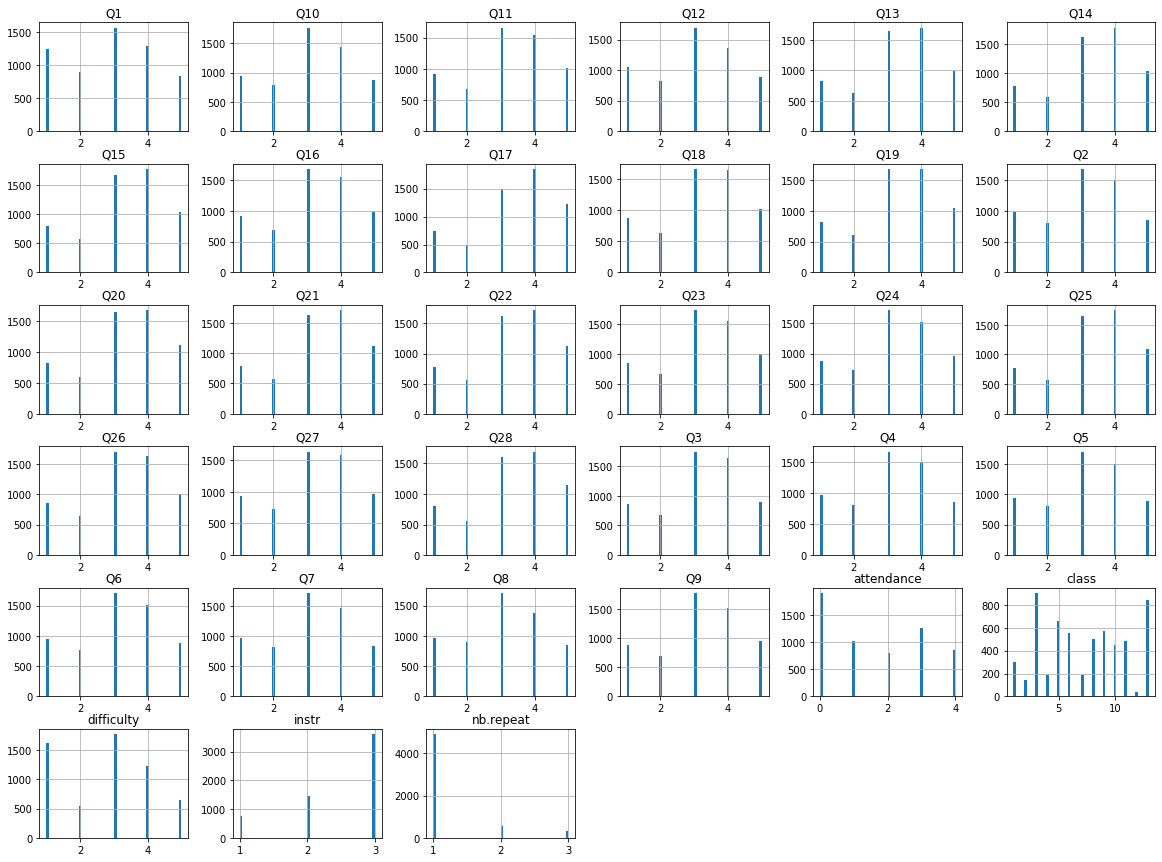

In [113]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

### Correlations of topics

We put all the questions concerning competence, openness and satisfaction into 3 groups.

* **Satisfaction** Student's satisfaction of the course: Q5, Q9, Q10, Q11, Q12.
* **Openness** Instructors openness: Q20, Q21, Q22, Q23, Q24, Q27, Q28.
* **Competence** Instructors compentences: Q13, Q14, Q15, Q16, Q18, Q19.

Next we calculate the mean per group for the questions.

In [114]:
dataset['Satisfaction'] = dataset.apply(lambda x: round((x['Q3'] + x['Q5'] + x['Q9'] + x['Q10'] + x['Q11'] + x['Q12']) / 6, 2), axis=1)
dataset['Openness'] = dataset.apply(lambda x: round((x['Q21'] + x['Q22'] + x['Q23'] + x['Q24'] + x['Q27'] + x['Q28']) / 6, 2), axis=1)
dataset['Competence'] = dataset.apply(lambda x: round((x['Q13'] + x['Q14'] + x['Q15'] + x['Q16'] + x['Q18'] + x['Q19'] + x['Q20']) / 7, 2), axis=1)

In [115]:
dataset = dataset[['instr', 'class', 'nb.repeat','attendance', 'difficulty', 'Satisfaction', 'Openness', 'Competence']]


(8.0, 0.0)

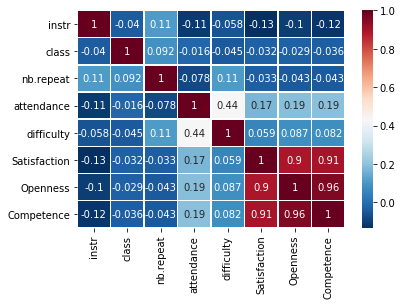

In [116]:
pearsoncorr = dataset.corr(method='pearson')
ax = sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns, cmap='RdBu_r', annot=True, linewidth=0.5,
            yticklabels=pearsoncorr.columns)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


### Number of students assigned to each instructor

Text(0.5, 1.0, 'Number of students assigned to each instructor')

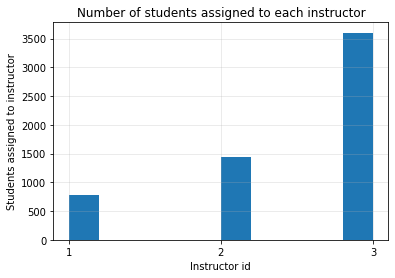

In [117]:
dataset["instr"].hist()
plt.grid(alpha=0.3)
teacher_id = dataset['instr'].unique()
plt.xticks(teacher_id)
plt.xlabel('Instructor id')
plt.ylabel('Students assigned to instructor')
plt.title('Number of students assigned to each instructor')


As showed in the diagram above teacher 3 has over double the amount of students that teacher 1 and 2 has.

### Mean of the satisfication, openness and competence questions grouped by the instructor

In [118]:
dataset.groupby(['instr']).mean()

,class,nb.repeat,attendance,difficulty,Satisfaction,Openness,Competence
instr,,,,,,,
1,7.830968,1.135484,1.998710,3.092903,3.363342,3.379781,3.420800
2,7.106648,1.124654,1.786704,2.679363,3.332112,3.462680,3.483934
3,7.224938,1.266870,1.561511,2.758678,2.993574,3.125079,3.121777


([<matplotlib.axis.YTick at 0x1a18726750>,
 <a list of 6 Text yticklabel objects>)

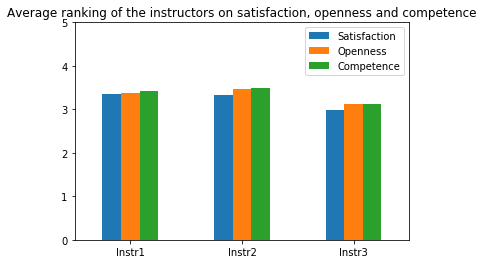

In [119]:
satisfaction = [3.363, 3.332, 2.993]
openness = [3.379, 3.462, 3.125]
competence = [3.420, 3.483, 3.121]


y_axis = [i for i in range(0, 6)]
index = ['Instr1', 'Instr2', 'Instr3']
dataset = pd.DataFrame({'Satisfaction': satisfaction,
                   'Openness': openness,
                   'Competence': competence
                  }, index=index)
ax = dataset.plot.bar(rot=0)
plt.title('Average ranking of the instructors on satisfaction, openness and competence')
plt.yticks(y)


In this diagram we can see that the instructor with the most students and classes, instructor 3, is also the instructor who has gotten the lowest rating concerning satisfication, openness and competence. 
This could point to the fact that instructors with less classes have more time for preparation, and that pays of, because these instructors have been rated higher.